# Create Plots for the Thesis

In [1]:
# Imports
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# Font
my_fontsize = 18
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# RepRisk Rating distribution over time

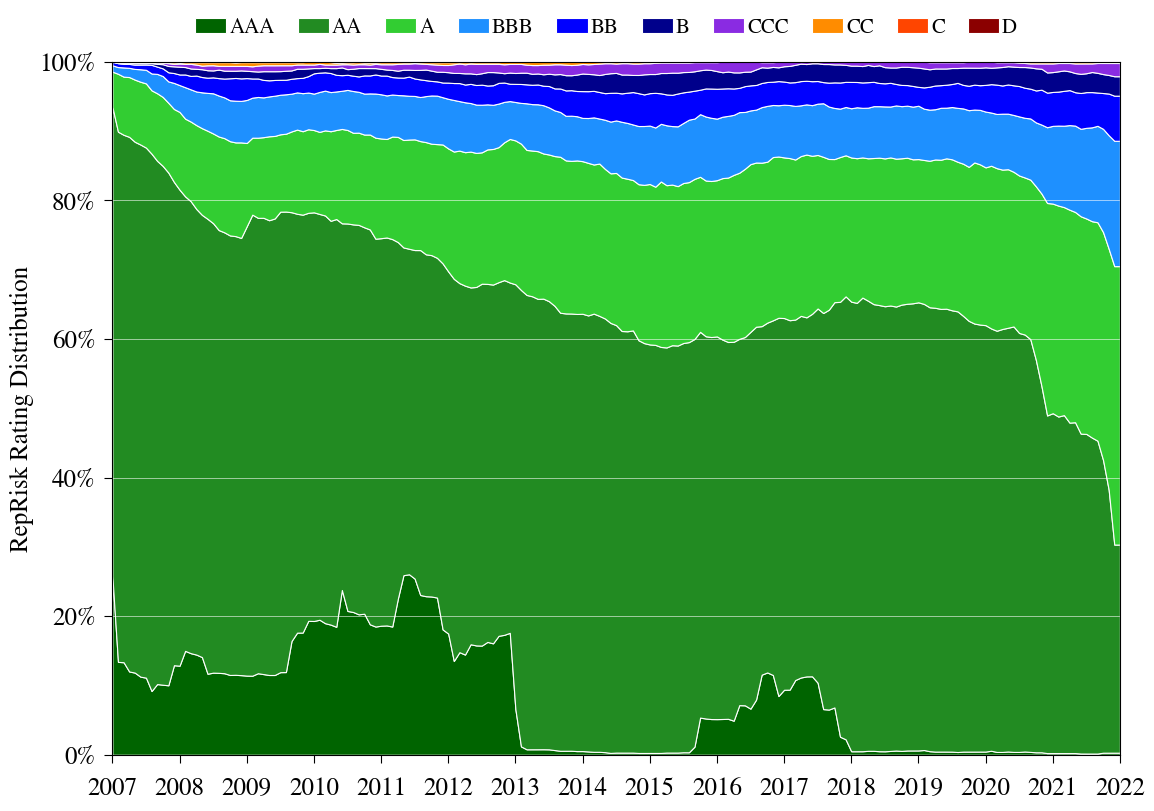

In [2]:
# Load data
df = pd.read_parquet('C:/Users/rafae/Documents/HSG/Master Thesis/Data/Final/data05_preprocessed.parquet')
df["YM"] = (df["DATE"] - pd.DateOffset(months=1)).dt.to_period("M")
df['YM'] = df.YM.astype(str)
df = df.sort_values(by=['YM', 'permno'])
df = df[['YM', 'permno', 'reprisk_rating']]

# Calculate the distribution over time
df = df.groupby(['YM', 'reprisk_rating']).size().reset_index(name='counts')
df = pd.merge(df, df.groupby('YM')['counts'].sum(), on='YM')
df['value'] = df['counts_x'] / df['counts_y'] * 100
df = df[['YM', 'reprisk_rating', 'value']]
df

# Make a pivot
df = pd.pivot(df, index='YM', columns='reprisk_rating', values='value').fillna(0)
df = df.reset_index()

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,181)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Create Plot
fig, ax = plt.subplots(figsize=(13, 9))

# Plot
x = df['YM']
reprisk_colors = ['darkgreen', 'forestgreen', 'limegreen', 'dodgerblue', 'blue', 'darkblue', 'blueviolet', 'darkorange', 'orangered', 'darkred']
plt.stackplot(x,df['AAA'],df['AA'],df['A'],df['BBB'],df['BB'],df['B'],df['CCC'],df['CC'],df['C'],df['D'], edgecolor='white',
              labels=['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D'], colors=reprisk_colors, linewidth=0.8)
ax.set_ylabel('RepRisk Rating Distribution', fontsize=my_fontsize)

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.49, 1.09), frameon=False, ncol=10, columnspacing=1.1, handletextpad=0.15, fontsize=15, handlelength=1.5)

# Style
ax.set_xlim([x.iloc[0], x.iloc[-1]])
ax.set_ylim([0, 100])
ax.set_xticks(np.arange(0,181,12))
ax.set_xticklabels(years)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
ax.grid(color='white', linewidth=0.4)
ax.grid(axis='x')
plt.savefig('reprisk_rating_composition.png', dpi=1200, bbox_inches='tight');  # Save figure

# Sample Splitting: 4 Fold Cross validation

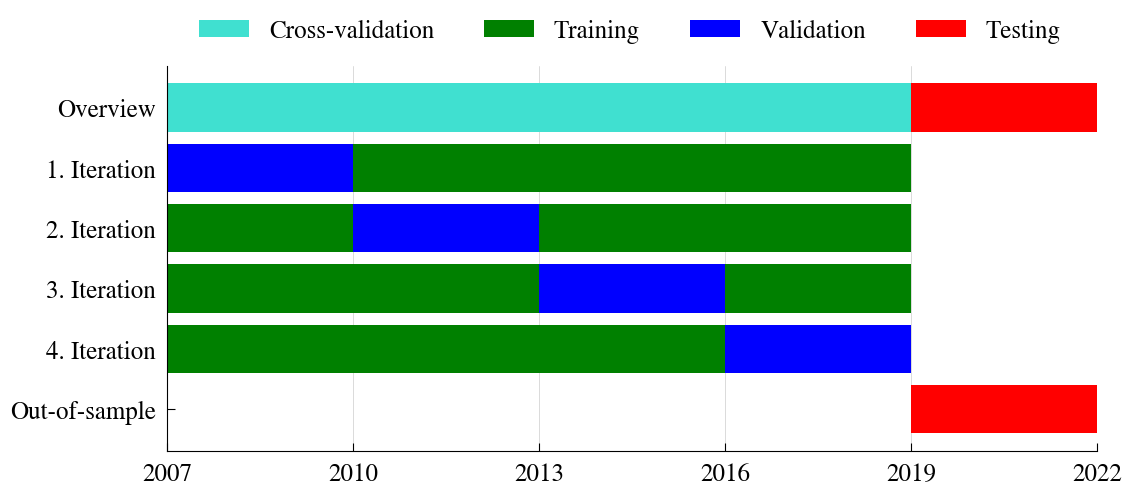

In [3]:
# Specify data
names = ['Out-of-sample', '4. Iteration', '3. Iteration', '2. Iteration', '1. Iteration', 'Overview']
cv = [0, 0, 0, 0, 0, 12]
trai1 = [0, 9, 6, 3, 0, 0]
val = [0, 3, 3, 3, 3, 0]
trai2 = [0, 0, 3, 6, 9, 0]
invisible = [12, 0, 0, 0, 0, 0]
test = [3, 0, 0, 0, 0, 3]
data = np.array(list([cv, trai1, val, trai2, invisible, test]))
data_cum = data.cumsum(axis=0)

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(names, cv, color='turquoise', label='Cross-validation')
ax.barh(names, trai1, left=data_cum[0], color='green', label='Training')
ax.barh(names, val, left=data_cum[1], color='blue', label='Validation')
ax.barh(names, trai2, left=data_cum[2], color='green')
ax.barh(names, test, left=data_cum[4], color='red', label='Testing')

# Legend
ax.legend(ncol=5, loc='lower left', bbox_to_anchor=(0.01,1), fontsize=my_fontsize, frameon=False)

# Style
ax.set_xlim([0,15])
ax.set_xticks(np.arange(0,16,3), [2007, 2010, 2013, 2016, 2019, 2022])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)  # grid behind plots
ax.grid(color='silver', linewidth=0.4)
ax.grid(axis='y')
ax.tick_params(direction='in', colors='black', length=6, pad=8, labelsize=my_fontsize)
plt.savefig('sample_splitting.png', dpi=800, bbox_inches='tight');  # Save figure

# Sharpe Ratio (SR) of Long-Short Portfolios

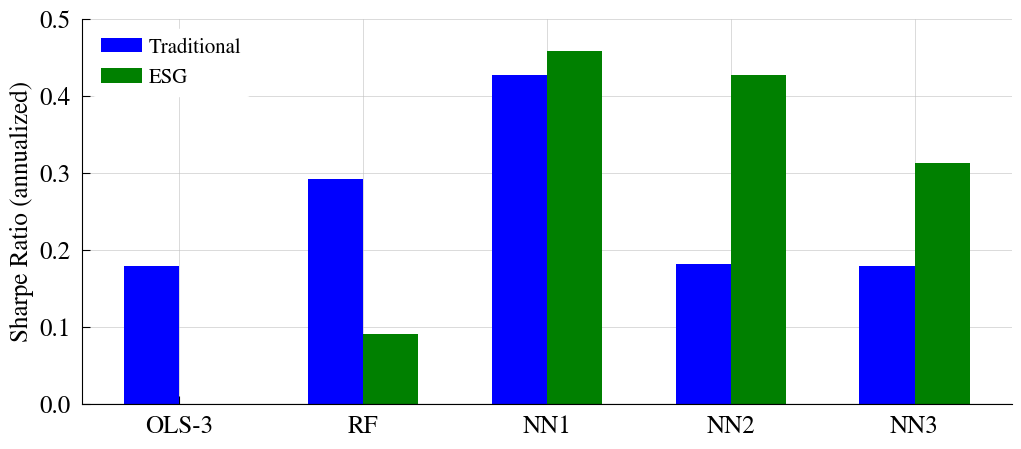

In [4]:
# Specify data
df = pd.read_excel(r'empirical_analysis/ew_performance_wml.xlsx').set_index('performance_metrics').T.reset_index()
df = df.rename(columns={'SR_(p.a.)':'SR', 'index':'model'}).set_index('model')[['SR']]
label = ['OLS-3', 'RF', 'NN1', 'NN2', 'NN3']
trad = [df.loc['OLS-3','SR'], df.loc['RF_trad','SR'], df.loc['NN1_trad','SR'], df.loc['NN2_trad','SR'], df.loc['NN3_trad','SR']] 
esg = [0, df.loc['RF_esg','SR'], df.loc['NN1_esg','SR'], df.loc['NN2_esg','SR'], df.loc['NN3_esg','SR']] 

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 5))
r = np.arange(len(label))
width = 0.3
ax.bar(r, trad, color = 'blue', width = width, label='Traditional')
ax.bar(r + width, esg, color = 'green', width = width, label='ESG')
ax.set_ylabel('Sharpe Ratio (annualized)', fontsize=my_fontsize)  
ax.set_xticks(r + width/2, label)
ax.legend(loc='upper left', frameon=True, handletextpad=0.3, fontsize=15, handlelength=2, facecolor='white', framealpha=1, edgecolor='white')

# Style
ax.set_ylim([0,0.5])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)  # grid behind plots
ax.grid(color='silver', linewidth=0.4)
ax.tick_params(direction='in', colors='black', length=6, pad=8, labelsize=my_fontsize)
plt.draw()
plt.savefig('SR_ew.png', dpi=800, bbox_inches='tight');  # Save figure

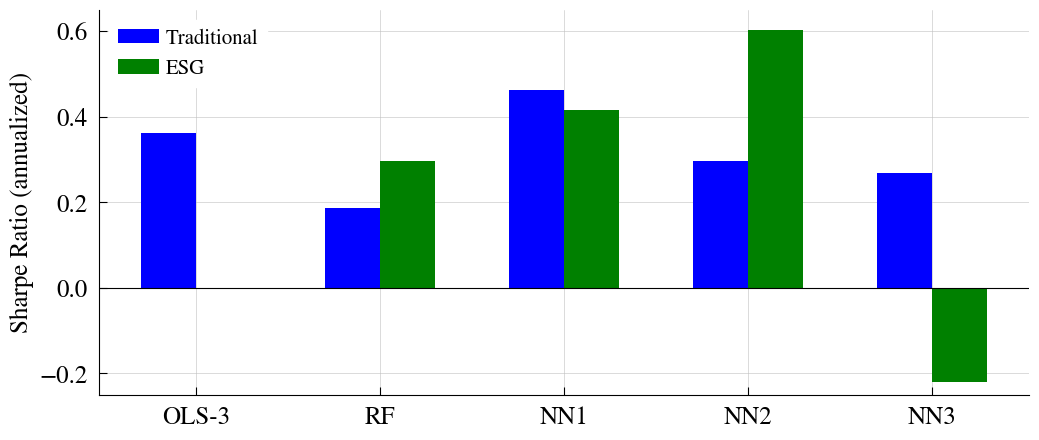

In [5]:
# Specify data
df = pd.read_excel(r'empirical_analysis/vw_performance_wml.xlsx').set_index('performance_metrics').T.reset_index()
df = df.rename(columns={'SR_(p.a.)':'SR', 'index':'model'}).set_index('model')[['SR']]
label = ['OLS-3', 'RF', 'NN1', 'NN2', 'NN3']
trad = [df.loc['OLS-3','SR'], df.loc['RF_trad','SR'], df.loc['NN1_trad','SR'], df.loc['NN2_trad','SR'], df.loc['NN3_trad','SR']] 
esg = [0, df.loc['RF_esg','SR'], df.loc['NN1_esg','SR'], df.loc['NN2_esg','SR'], df.loc['NN3_esg','SR']] 

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 5))
r = np.arange(len(label))
width = 0.3
ax.bar(r, trad, color = 'blue', width = width, label='Traditional')
ax.bar(r + width, esg, color = 'green', width = width, label='ESG')
ax.set_ylabel('Sharpe Ratio (annualized)', fontsize=my_fontsize)  
ax.set_xticks(r + width/2, label)
ax.legend(loc='upper left', frameon=True, handletextpad=0.3, fontsize=15, handlelength=2, facecolor='white', framealpha=1, edgecolor='white')

# Style
ax.set_ylim([-0.25,0.65])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)  # grid behind plots
ax.grid(color='silver', linewidth=0.4)
ax.tick_params(direction='in', colors='black', length=6, pad=8, labelsize=my_fontsize)
plt.draw()
plt.savefig('SR_vw.png', dpi=800, bbox_inches='tight');  # Save figure

# $R^2$-score

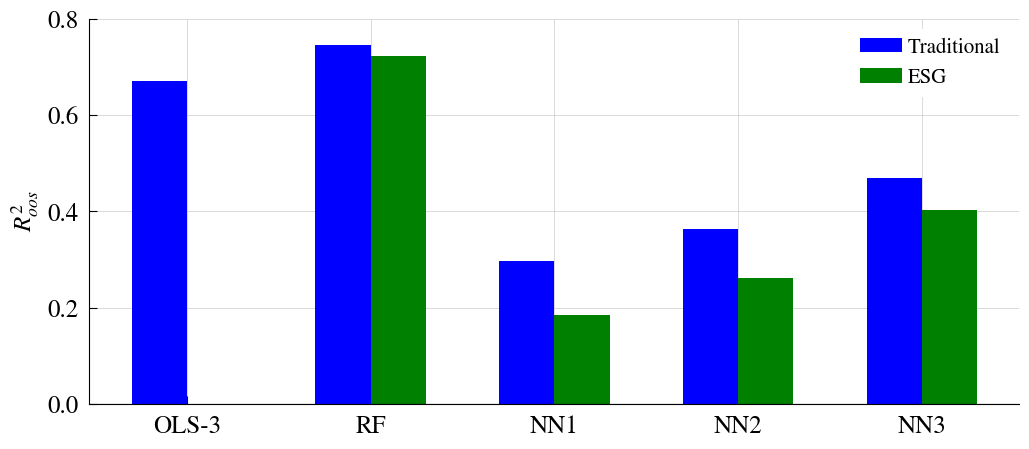

In [6]:
# Specify data
df = pd.read_excel(r'empirical_analysis/r2_scores.xlsx').set_index('model')
df = df.rename(columns={'r2_score':'R2'})
df = df * 100  # get percentage points
label = ['OLS-3', 'RF', 'NN1', 'NN2', 'NN3']
trad = [df.loc['OLS-3','R2'], df.loc['RF_trad','R2'], df.loc['NN1_trad','R2'], df.loc['NN2_trad','R2'], df.loc['NN3_trad','R2']] 
esg = [0, df.loc['RF_esg','R2'], df.loc['NN1_esg','R2'], df.loc['NN2_esg','R2'], df.loc['NN3_esg','R2']] 

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 5))
r = np.arange(len(label))
width = 0.3
ax.bar(r, trad, color = 'blue', width = width, label='Traditional')
ax.bar(r + width, esg, color = 'green', width = width, label='ESG')
ax.set_ylabel(r'$R_{oos}^2$', fontsize=my_fontsize)
ax.set_xticks(r + width/2, label)
ax.legend(loc='upper right', frameon=True, handletextpad=0.3, fontsize=15, handlelength=2, facecolor='white', framealpha=1, edgecolor='white')

# Style
ax.set_ylim([0,0.8])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_axisbelow(True)  # grid behind plots
ax.grid(color='silver', linewidth=0.4)
ax.tick_params(direction='in', colors='black', length=6, pad=8, labelsize=my_fontsize)
plt.draw()
plt.savefig('r2_scores.png', dpi=800, bbox_inches='tight');  # Save figure

# Machine Learning Portfolios over time

In [7]:
# Specify colors
colors = ['orange', 'red', 'm', 'blue', 'green']

### Evolution of long and short portfolios

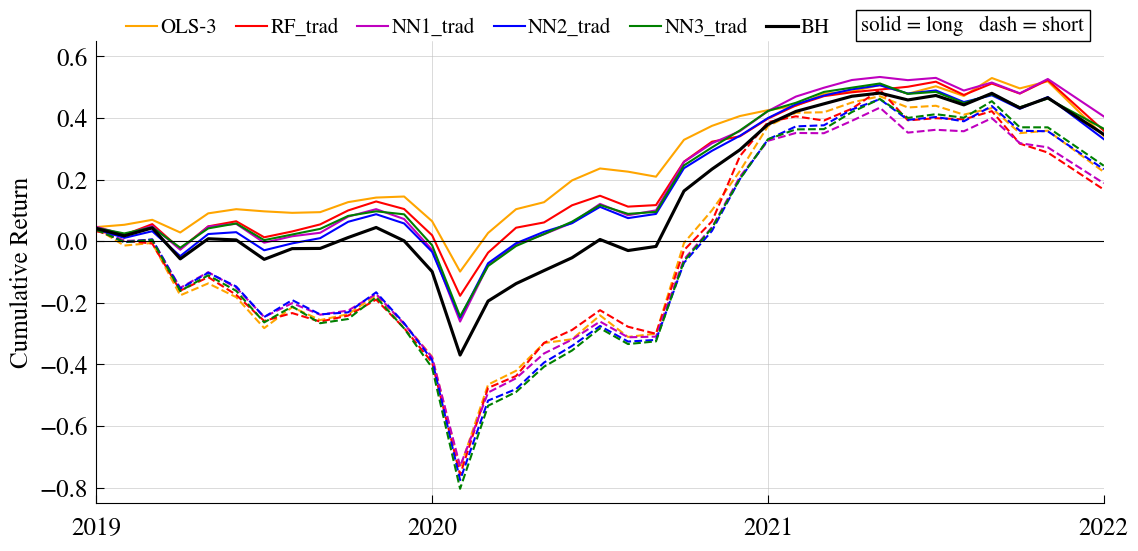

In [8]:
# Define models
models = ['OLS-3', 'RF_trad', 'NN1_trad', 'NN2_trad', 'NN3_trad']

# Get data
df = pd.read_excel(r'empirical_analysis/ew_plot_long.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, '{}_long'.format(model)].cumsum(), color=colors[i], linestyle='-', label=model)  # plot winner
    ax.plot(x, df.loc[:, '{}_short'.format(model)].cumsum(), color=colors[i], linestyle='--')  # plot loser
    i += 1
ax.plot(x, df.loc[:, 'buy_and_hold'].cumsum(), 'k-', label='BH', linewidth=2.25) # Buy and Hold
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.011, 1.09), ncol=6, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
ax.text(0.87, 1.012, r'solid = long   dash = short', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, bbox=dict(facecolor='white'), fontsize=15)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.85, 0.65])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_ew_long_trad.png', dpi=800, bbox_inches='tight');  # Save figure

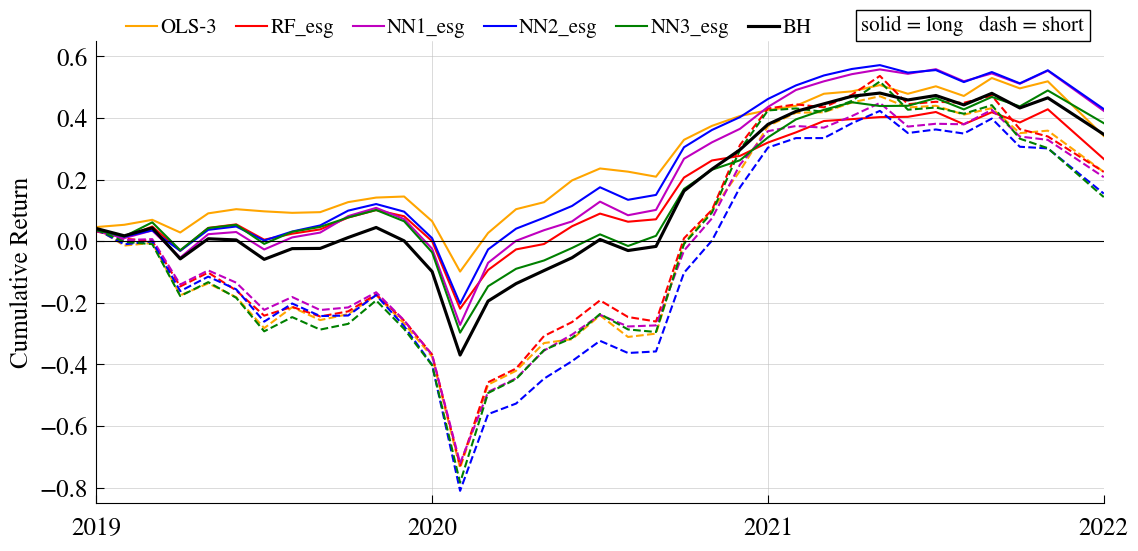

In [9]:
# Define models
models = ['OLS-3', 'RF_esg', 'NN1_esg', 'NN2_esg', 'NN3_esg']

# Get data
df = pd.read_excel(r'empirical_analysis/ew_plot_long.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, '{}_long'.format(model)].cumsum(), color=colors[i], linestyle='-', label=model)  # plot winner
    ax.plot(x, df.loc[:, '{}_short'.format(model)].cumsum(), color=colors[i], linestyle='--')  # plot loser
    i += 1
ax.plot(x, df.loc[:, 'buy_and_hold'].cumsum(), 'k-', label='BH', linewidth=2.25) # Buy and Hold
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.011, 1.09), ncol=6, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
ax.text(0.87, 1.012, r'solid = long   dash = short', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, bbox=dict(facecolor='white'), fontsize=15)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.85, 0.65])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_ew_long_esg.png', dpi=800, bbox_inches='tight');  # Save figure

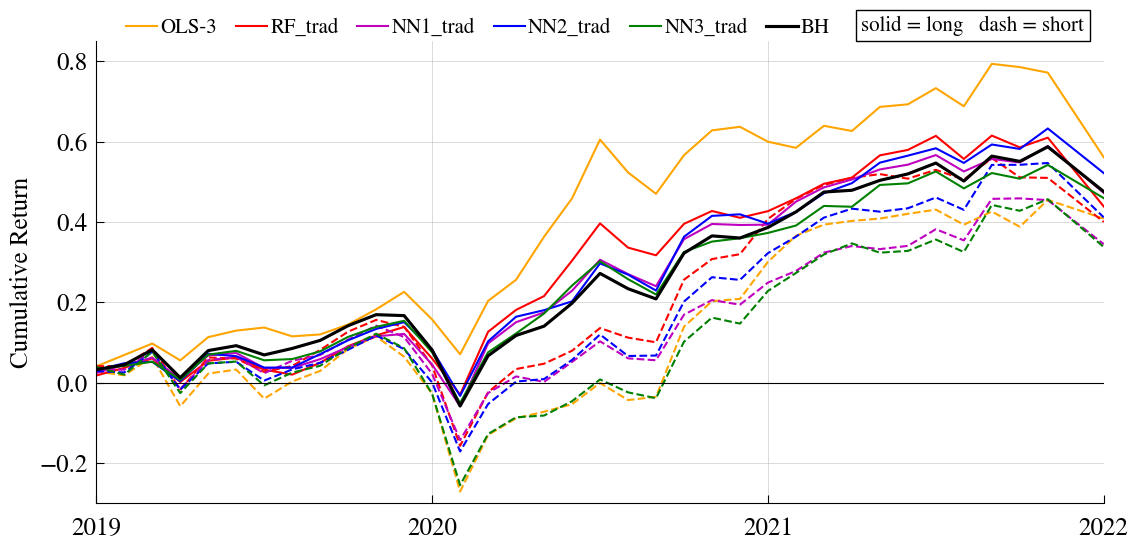

In [10]:
# Define models
models = ['OLS-3', 'RF_trad', 'NN1_trad', 'NN2_trad', 'NN3_trad']

# Get data
df = pd.read_excel(r'empirical_analysis/vw_plot_long.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, '{}_long'.format(model)].cumsum(), color=colors[i], linestyle='-', label=model)  # plot winner
    ax.plot(x, df.loc[:, '{}_short'.format(model)].cumsum(), color=colors[i], linestyle='--')  # plot loser
    i += 1
ax.plot(x, df.loc[:, 'buy_and_hold'].cumsum(), 'k-', label='BH', linewidth=2.25) # Buy and Hold
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.011, 1.09), ncol=6, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
ax.text(0.87, 1.012, r'solid = long   dash = short', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, bbox=dict(facecolor='white'), fontsize=15)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.3, 0.85])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_vw_long_trad.png', dpi=800, bbox_inches='tight');  # Save figure

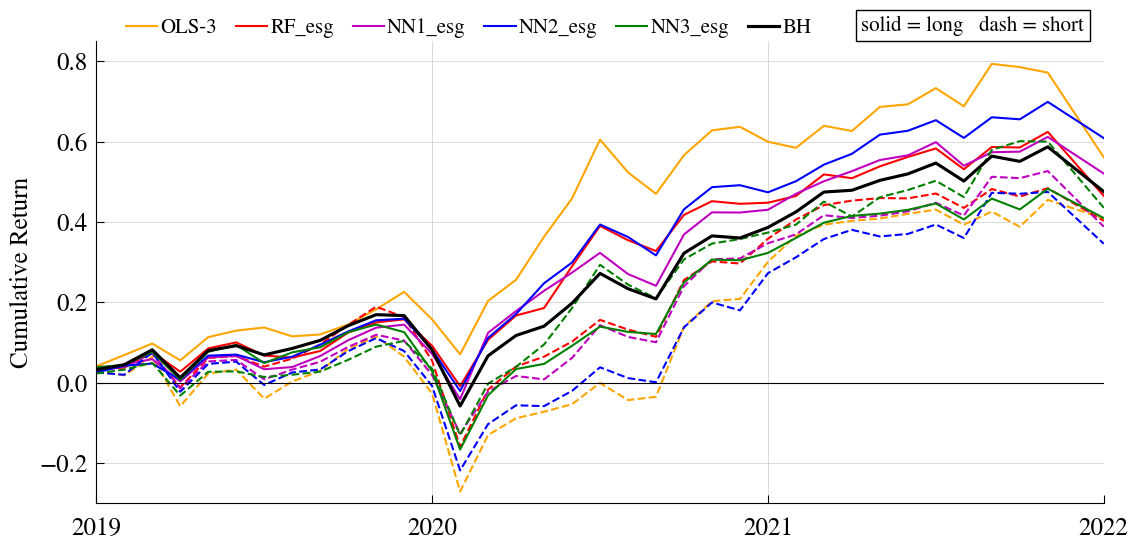

In [11]:
# Define models
models = ['OLS-3', 'RF_esg', 'NN1_esg', 'NN2_esg', 'NN3_esg']

# Get data
df = pd.read_excel(r'empirical_analysis/vw_plot_long.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, '{}_long'.format(model)].cumsum(), color=colors[i], linestyle='-', label=model)  # plot winner
    ax.plot(x, df.loc[:, '{}_short'.format(model)].cumsum(), color=colors[i], linestyle='--')  # plot loser
    i += 1
ax.plot(x, df.loc[:, 'buy_and_hold'].cumsum(), 'k-', label='BH', linewidth=2.25) # Buy and Hold
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.011, 1.09), ncol=6, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
ax.text(0.87, 1.012, r'solid = long   dash = short', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes, bbox=dict(facecolor='white'), fontsize=15)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.3, 0.85])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_vw_long_esg.png', dpi=800, bbox_inches='tight');  # Save figure

### Evolution of long/short spread portfolios

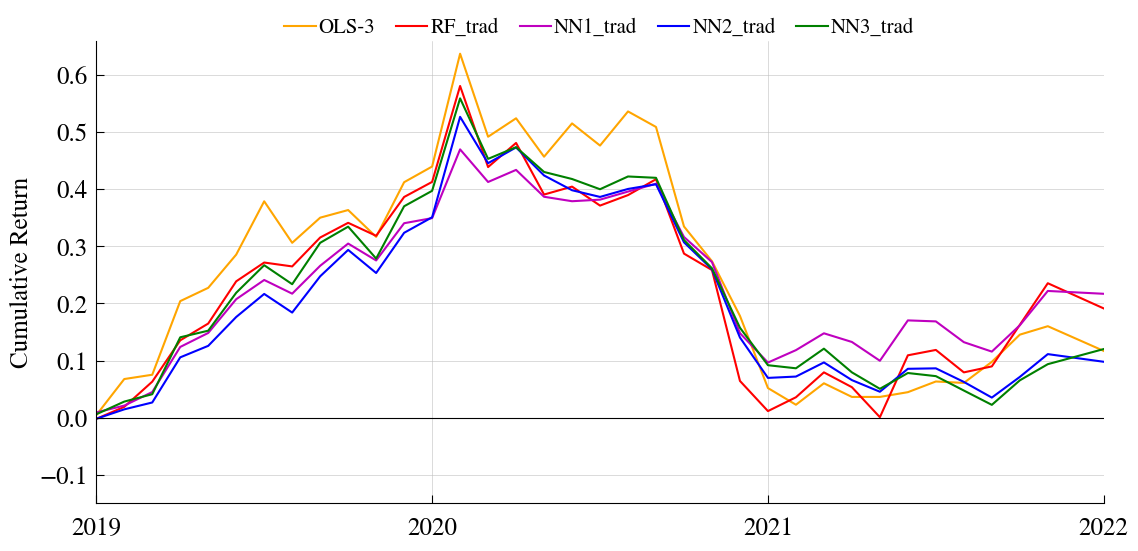

In [12]:
# Define models
models = ['OLS-3', 'RF_trad', 'NN1_trad', 'NN2_trad', 'NN3_trad']

# Get data
df = pd.read_excel(r'empirical_analysis/ew_plot_long_short.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, model].cumsum(), color=colors[i], linestyle='-', label=model) # plot long-short
    i += 1
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.168, 1.09), ncol=5, columnspacing=1, handletextpad=0.15, fontsize=15, handlelength=1.5)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.15, 0.66])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_ew_ls_trad.png', dpi=800, bbox_inches='tight');  # Save figure

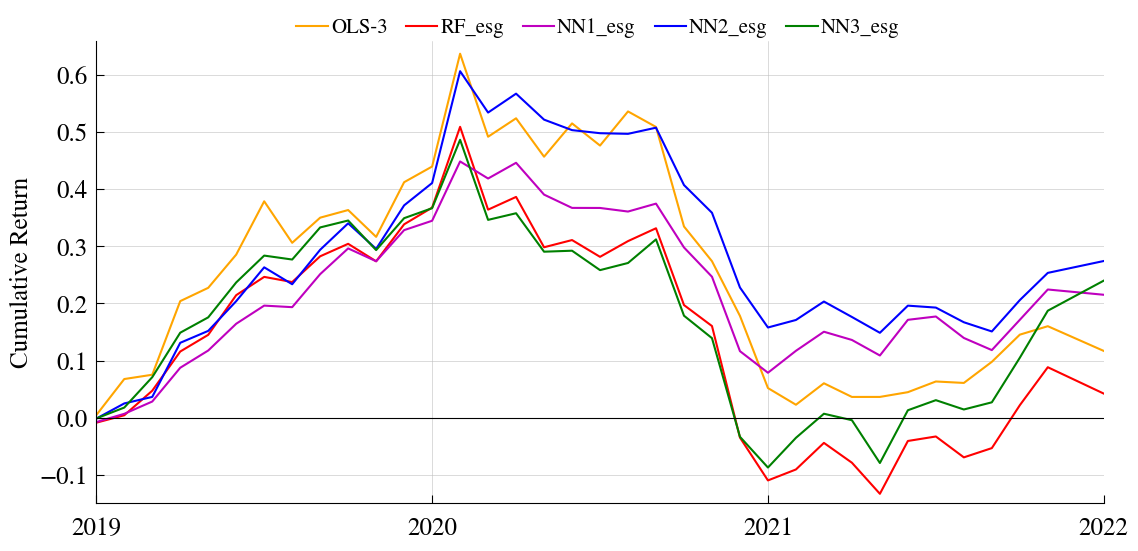

In [13]:
# Define models
models = ['OLS-3', 'RF_esg', 'NN1_esg', 'NN2_esg', 'NN3_esg']

# Get data
df = pd.read_excel(r'empirical_analysis/ew_plot_long_short.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, model].cumsum(), color=colors[i], linestyle='-', label=model) # plot long-short
    i += 1
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.18, 1.09), ncol=5, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.15, 0.66])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_ew_ls_esg.png', dpi=800, bbox_inches='tight');  # Save figure

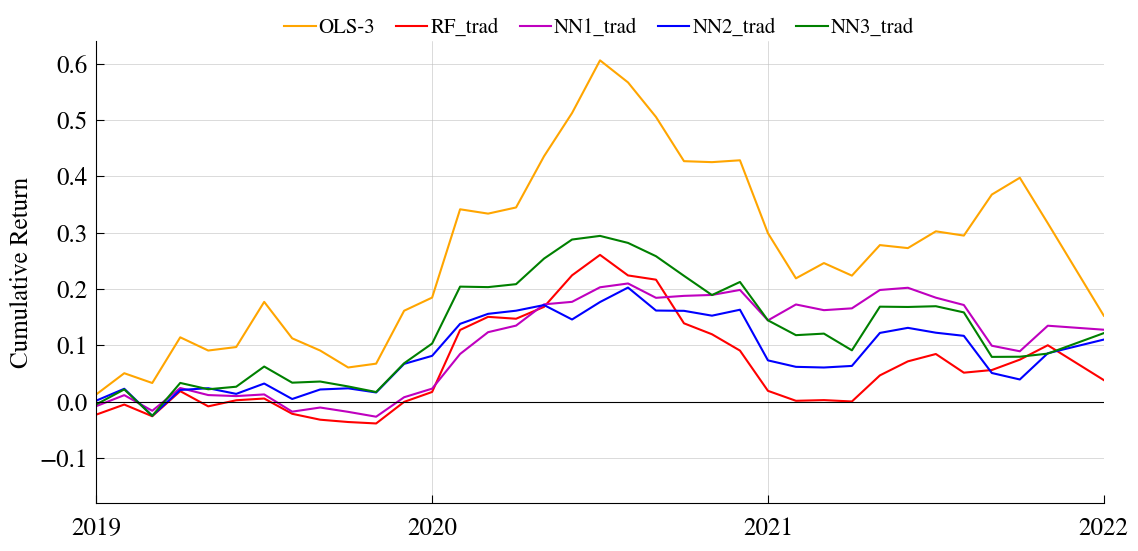

In [14]:
# Define models
models = ['OLS-3', 'RF_trad', 'NN1_trad', 'NN2_trad', 'NN3_trad']

# Get data
df = pd.read_excel(r'empirical_analysis/vw_plot_long_short.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, model].cumsum(), color=colors[i], linestyle='-', label=model) # plot long-short
    i += 1
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.168, 1.09), ncol=5, columnspacing=1, handletextpad=0.15, fontsize=15, handlelength=1.5)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.18, 0.64])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_vw_ls_trad.png', dpi=800, bbox_inches='tight');  # Save figure

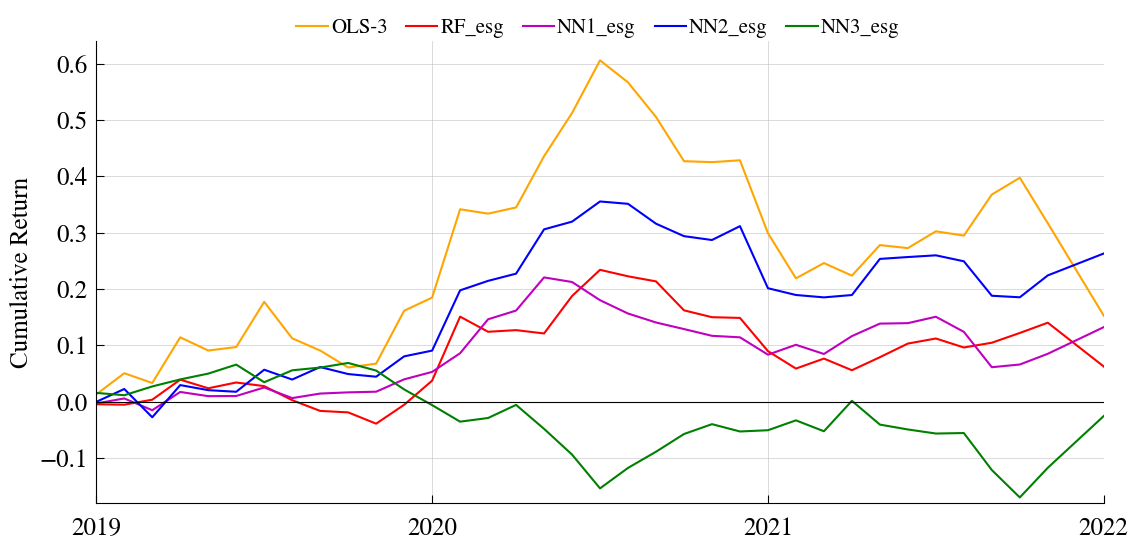

In [15]:
# Define models
models = ['OLS-3', 'RF_esg', 'NN1_esg', 'NN2_esg', 'NN3_esg']

# Get data
df = pd.read_excel(r'empirical_analysis/vw_plot_long_short.xlsx')

# Create Plot
fig, ax = plt.subplots(figsize=(13, 6))
i = 0

# Create 2022 tick
df = pd.concat([df, df.tail(1)])
df.iloc[-1,0] = '2022-01'
df.index = np.arange(0,37)

# Specify years
years = np.array(pd.DatetimeIndex(df.YM).year.drop_duplicates())

# Plot
x = df['YM']
for model in models:
    ax.plot(x, df.loc[:, model].cumsum(), color=colors[i], linestyle='-', label=model) # plot long-short
    i += 1
ax.set_ylabel('Cumulative Return', fontsize=my_fontsize)  
    
# Legend
ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.18, 1.09), ncol=5, columnspacing=0.9, handletextpad=0.15, fontsize=15, handlelength=1.5)
    
# Style
ax.set_xlim(['2019-01', '2022-01'])
ax.set_ylim([-0.18, 0.64])
ax.axhline(y=0, color='black', linestyle='solid', linewidth=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='silver', linewidth=0.4)
ax.set_xticks(np.arange(0,37,12))
ax.set_xticklabels(years)
ax.tick_params(direction='in', colors='black', length=6, pad=6, labelsize=my_fontsize)
ax.tick_params(axis='x', pad=10)
plt.savefig('plot_vw_ls_esg.png', dpi=800, bbox_inches='tight');  # Save figure